In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barrow us
rikitea pf
batabano cu
kastamonu tr
ribeira grande pt
nantucket us
la asuncion ve
cedar city us
punta arenas cl
lata sb
emerald au
busselton au
murray bridge au
necochea ar
saint-augustin ca
mys shmidta ru
saint-philippe re
ushuaia ar
barrow us
port alfred za
nikolskoye ru
punta arenas cl
matamoros mx
jacqueville ci
busselton au
bredasdorp za
mataura pf
rikitea pf
ushuaia ar
salalah om
ilulissat gl
yellowknife ca
torbay ca
albany au
mataura pf
rikitea pf
norman wells ca
rikitea pf
kapaa us
hermanus za
horsham au
attawapiskat ca
hasaki jp
taolanaro mg
rikitea pf
kapaa us
vaini to
port alfred za
butaritari ki
hilo us
aksarka ru
richards bay za
hobart au
puerto ayora ec
karaul ru
beidao cn
berlevag no
hualmay pe
kapaa us
jamestown sh
ushuaia ar
punta arenas cl
cape town za
mataura pf
impfondo cg
taolanaro mg
atuona pf
barrow us
upernavik gl
ixtapa mx
norman wells ca
chokurdakh ru
sobolevo ru
taolanaro mg
sentyabrskiy ru
nikolskoye ru
cherskiy ru
butaritari ki
el alto pe
fortuna 

bredasdorp za
partizanskoye ru
thompson ca
solnechnyy ru
waiuku nz
tuktoyaktuk ca
qaanaaq gl
eureka us
saldanha za
rantepao id
albany au
haines junction ca
punta arenas cl
hermanus za
chenghai cn
husavik is
marawi sd
taolanaro mg
umm lajj sa
dunedin nz
constitucion mx
sotouboua tg
sitka us
kodiak us
cam pha vn
lebu cl
harwich us
ushuaia ar
avarua ck
yanam in
rikitea pf
quatre cocos mu
mataura pf
avarua ck
saskylakh ru
qaanaaq gl
evensk ru
punta arenas cl
bethel us
lompoc us
vaini to
bluff nz
cookeville us
boende cd
rikitea pf
brzi brod rs
krasnovishersk ru
punta arenas cl
hovd mn
ribeira grande pt
hilo us
laguna br
lompoc us
puerto ayora ec
rikitea pf
rapid city us
cape town za
shima cn
banda aceh id
vaini to
walvis bay na
bentiu sd
nanortalik gl
rikitea pf
cusuna hn
kapaa us
rikitea pf
hilo us
busselton au
aksha ru
kadykchan ru
hualmay pe
kharan pk
busselton au
ternate id
arraial do cabo br
georgetown sh
narsaq gl
punto fijo ve
kapaa us
ahipara nz
busselton au
albany au
khatanga ru
av

fortuna us
taksimo ru
chicama pe
grand centre ca
new norfolk au
tidore id
komsomolskiy ru
illoqqortoormiut gl
sur om
oristano it
murfreesboro us
lorengau pg


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | batabano
Processing Record 4 of Set 1 | kastamonu
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | la asuncion
Processing Record 8 of Set 1 | cedar city
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | emerald
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | murray bridge
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | saint-augustin
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | matamoros
Processing Record 22 of Set 1 | jacqueville
Processing Record 23 of Set 1 | bredasdor

Processing Record 37 of Set 4 | mount gambier
Processing Record 38 of Set 4 | stephenville
Processing Record 39 of Set 4 | misratah
Processing Record 40 of Set 4 | harper
Processing Record 41 of Set 4 | le havre
Processing Record 42 of Set 4 | kanniyakumari
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | bluff
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | vestmanna
Processing Record 47 of Set 4 | labutta
City not found. Skipping...
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | batticaloa
Processing Record 50 of Set 4 | glyadyanskoye
Processing Record 1 of Set 5 | kieta
Processing Record 2 of Set 5 | sayat
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | nacala
Processing Record 5 of Set 5 | filadelfia
Processing Record 6 of Set 5 | zhigansk
Processing Record 7 of Set 5 | honningsvag
Processing Record 8 of Set 5 | touros
Processing R

Processing Record 29 of Set 8 | ucluelet
Processing Record 30 of Set 8 | grand gaube
Processing Record 31 of Set 8 | saravan
Processing Record 32 of Set 8 | vredendal
Processing Record 33 of Set 8 | porto velho
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | lambarene
Processing Record 36 of Set 8 | guadalupe y calvo
Processing Record 37 of Set 8 | sonqor
Processing Record 38 of Set 8 | kapuskasing
Processing Record 39 of Set 8 | terrak
Processing Record 40 of Set 8 | thiruvananthapuram
Processing Record 41 of Set 8 | susanville
Processing Record 42 of Set 8 | tarhunah
City not found. Skipping...
Processing Record 43 of Set 8 | pochutla
Processing Record 44 of Set 8 | brae
Processing Record 45 of Set 8 | port hardy
Processing Record 46 of Set 8 | tongzi
Processing Record 47 of Set 8 | tiarei
Processing Record 48 of Set 8 | santa cruz de la palma
Processing Record 49 of Set 8 | akyab
Processing Record 50 of Set 8 | ambon
Processing Record 1 of Set 9 | kota bahru
P

Processing Record 18 of Set 12 | geresk
City not found. Skipping...
Processing Record 19 of Set 12 | zhangjiakou
Processing Record 20 of Set 12 | rocky mountain house
Processing Record 21 of Set 12 | senno
Processing Record 22 of Set 12 | severobaykalsk
Processing Record 23 of Set 12 | kankon
Processing Record 24 of Set 12 | kempsey
Processing Record 25 of Set 12 | wuan
Processing Record 26 of Set 12 | mabai
Processing Record 27 of Set 12 | asau
Processing Record 28 of Set 12 | beisfjord
Processing Record 29 of Set 12 | high level
Processing Record 30 of Set 12 | glendive
Processing Record 31 of Set 12 | kutum
Processing Record 32 of Set 12 | dolores
Processing Record 33 of Set 12 | mwene-ditu
Processing Record 34 of Set 12 | zaraza
Processing Record 35 of Set 12 | kalmunai
Processing Record 36 of Set 12 | riyadh
Processing Record 37 of Set 12 | praya
Processing Record 38 of Set 12 | manokwari
Processing Record 39 of Set 12 | redlands
Processing Record 40 of Set 12 | bahia honda
Proces

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-16.58,69,100,0.00,US,2022-01-16 23:50:02
1,Rikitea,-23.1203,-134.9692,77.43,71,32,7.40,PF,2022-01-16 23:49:19
2,Batabano,22.7164,-82.2881,69.73,81,81,16.44,CU,2022-01-16 23:53:11
3,Kastamonu,41.5000,33.6667,15.75,97,89,3.47,TR,2022-01-16 23:53:12
4,Ribeira Grande,38.5167,-28.7000,56.95,62,36,17.47,PT,2022-01-16 23:53:12
5,Nantucket,41.2835,-70.0995,34.14,66,75,17.27,US,2022-01-16 23:52:04
6,La Asuncion,11.0333,-63.8628,80.33,83,43,14.97,VE,2022-01-16 23:53:13
7,Cedar City,37.6775,-113.0619,42.40,53,88,1.23,US,2022-01-16 23:53:13
8,Punta Arenas,-53.1500,-70.9167,48.31,46,0,19.57,CL,2022-01-16 23:48:47
9,Lata,40.1629,-8.3327,49.06,88,85,3.53,PT,2022-01-16 23:53:13


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-01-16 23:50:02,71.2906,-156.7887,-16.58,69,100,0.00
1,Rikitea,PF,2022-01-16 23:49:19,-23.1203,-134.9692,77.43,71,32,7.40
2,Batabano,CU,2022-01-16 23:53:11,22.7164,-82.2881,69.73,81,81,16.44
3,Kastamonu,TR,2022-01-16 23:53:12,41.5000,33.6667,15.75,97,89,3.47
4,Ribeira Grande,PT,2022-01-16 23:53:12,38.5167,-28.7000,56.95,62,36,17.47
5,Nantucket,US,2022-01-16 23:52:04,41.2835,-70.0995,34.14,66,75,17.27
6,La Asuncion,VE,2022-01-16 23:53:13,11.0333,-63.8628,80.33,83,43,14.97
7,Cedar City,US,2022-01-16 23:53:13,37.6775,-113.0619,42.40,53,88,1.23
8,Punta Arenas,CL,2022-01-16 23:48:47,-53.1500,-70.9167,48.31,46,0,19.57
9,Lata,PT,2022-01-16 23:53:13,40.1629,-8.3327,49.06,88,85,3.53


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

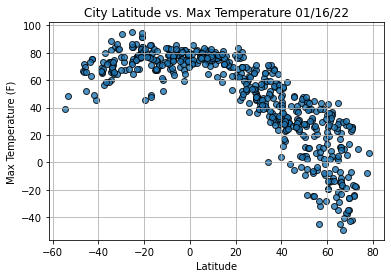

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

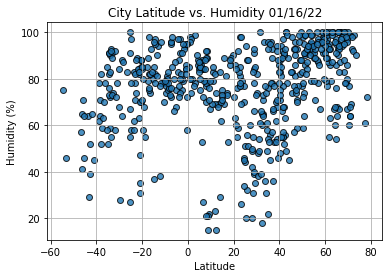

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

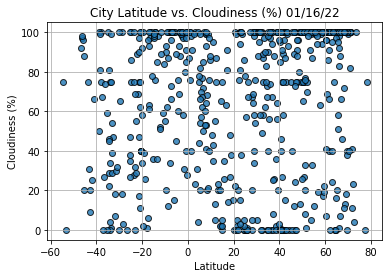

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

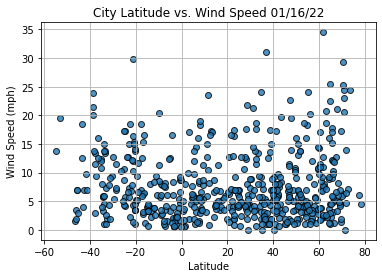

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()